In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data.csv')
df

,date,note,amount,total_amount
0,2025-01-01/00:00;00,Initial A,NaN,1000000.0
1,2025-01-02/12:30;00,food,-500.0,999500.0
2,2025-01-03/14:15;20,transport,-1500.0,998000.0
3,2025-01-04/09:00;00,entertainment,-1200.0,996800.0
4,2025-01-05/08:45;10,shopping,-2000.0,996000.0
...,...,...,...,...
57,2025-02-25/09:00;00,alba,14000.0,1046800.0
58,2025-02-26/08:45;10,entertainment,-1200.0,1045600.0
59,2025-02-27/15:00;20,transport,-1200.0,1044400.0
60,2025-02-28/10:00;00,shopping,-1500.0,1042900.0


In [6]:
df1 = df.drop('date', axis=1)
df1 = df1.drop('note', axis=1)
df1 = df1.drop('total_amount', axis=1)
df1 = df1.drop(0, axis=0)
df1

,amount
1,-500.0
2,-1500.0
3,-1200.0
4,-2000.0
5,-700.0
...,...
57,14000.0
58,-1200.0
59,-1200.0
60,-1500.0


In [7]:
in_a = []
out_a = []

for _, val in enumerate(df['amount']):

    if val >= 0:
        in_a.append(val)

    elif val < 0:
        out_a.append(val)

print(in_a, '\n', out_a)

[15000.0, 10000.0, 12000.0, 8000.0, 12000.0, 8000.0, 10000.0, 12000.0, 14000.0] 
 [-500.0, -1500.0, -1200.0, -2000.0, -700.0, -1000.0, -700.0, -1500.0, -1200.0, -2500.0, -300.0, -800.0, -600.0, -1000.0, -1500.0, -800.0, -1000.0, -400.0, -500.0, -2500.0, -1500.0, -1000.0, -2000.0, -1200.0, -500.0, -1500.0, -700.0, -700.0, -1000.0, -800.0, -1500.0, -2000.0, -1200.0, -500.0, -2500.0, -1000.0, -700.0, -1000.0, -1500.0, -600.0, -1000.0, -800.0, -2000.0, -400.0, -1500.0, -1000.0, -2500.0, -800.0, -1200.0, -1200.0, -1500.0, -700.0]


In [8]:
def amount_separator(li):
    thresholds = [300, 500, 700, 900, 1100, 1300, float('inf')]
    ret_summed_li = []
    ret_li = [[] for _ in thresholds]
    
    for val in li:
        val = abs(val)
        for i, threshold in enumerate(thresholds):
            if val <= threshold:
                ret_li[i].append(val)
                break

    for val in ret_li:
        ret_summed_li.append(int(sum(val)))

    return ret_summed_li


In [9]:
amount_separator(out_a)

[300, 2800, 5400, 4000, 9000, 7200, 31500]

[300, 2800, 5400, 4000, 9000, 7200, 31500] 31500 300


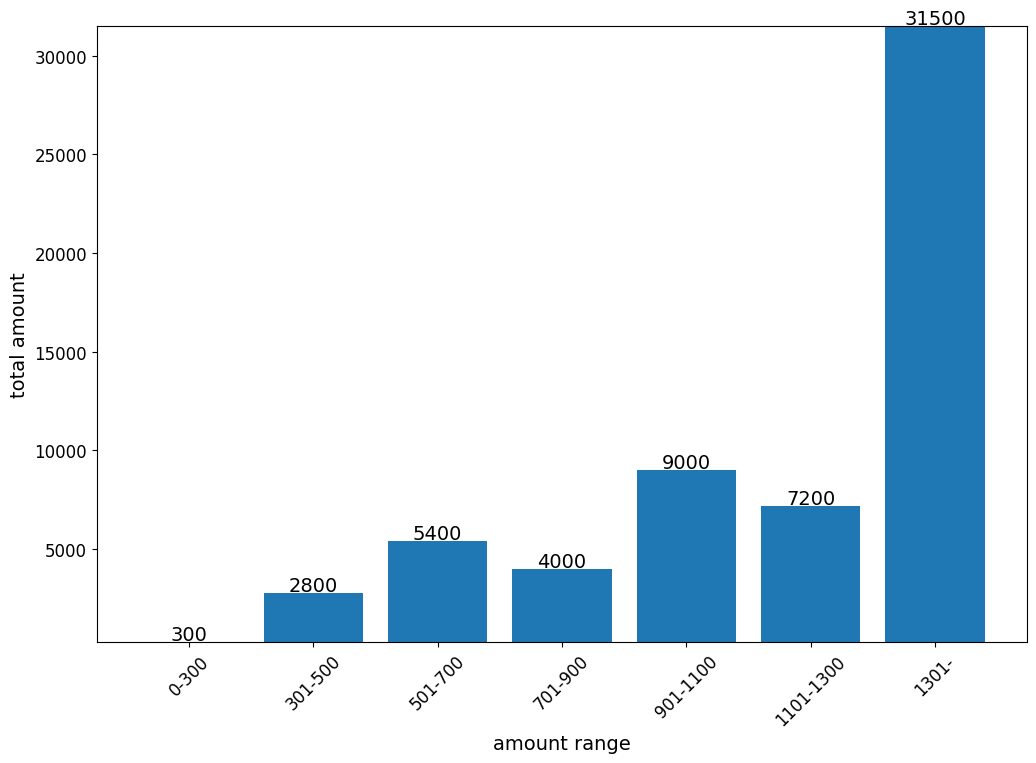

In [45]:
xlist = ['0-300','301-500','501-700','701-900','901-1100','1101-1300','1301-']
ylist = amount_separator(out_a)

plt.figure(figsize=(12, 8))
fig = plt.bar(xlist, ylist)
plt.xlabel('amount range', fontsize=14)
plt.ylabel('total amount', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

for idx, rect in enumerate(fig):
    plt.text(idx, rect.get_height() + 100, ylist[idx], 
             ha='center',
             color='black',
             fontsize=14)
    
j, k = 0, 1e10
for i in amount_separator(out_a):
    if j < i:
        j = i
    if k > i:
        k = i

plt.ylim(k, j)
print(amount_separator(out_a), j, k)

plt.show()